<a href="https://colab.research.google.com/github/Rukesh2274/Plant-Disease-Detection-using-CNN/blob/main/crop_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
zip_file=tf.keras.utils.get_file(origin='https://storage.googleapis.com/plantdata/PlantVillage.zip',
 fname='PlantVillage.zip', extract=True)
#Create the training and validation directories
data_dir = os.path.join(os.path.dirname(zip_file), 'PlantVillage')
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
sample_dir=os.path.join('/content/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG')

856839084/856839084 [==============================] - 11s 0us/step


In [ ]:
import json
with open('/content/drive/MyDrive/categories.json', 'r') as f:
    cat_to_name = json.load(f)
    classes = list(cat_to_name.values())

print (classes)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
module_selection = ("inception_v3", 299, 2048)
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2- preview/{}/feature_vector/2".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 64

In [ ]:
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    shuffle=False,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)
do_data_augmentation = True
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest' )
else:
  train_datagen = validation_datagen

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset="training",
    shuffle=True,
    seed=42,
    color_mode="rgb",
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 10861 images belonging to 38 classes.
Found 43444 images belonging to 38 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax',
                           kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])

In [ ]:
LEARNING_RATE = 0.001
model.compile(
   optimizer=tf.keras.optimizers.Adam(lr=LEARNING_RATE),
   loss='categorical_crossentropy',
   metrics=['accuracy'])

def show_confusion_matrix(cm, labels):
  plt.figure(figsize=(10, 8))
  sns.heatmap(model, xticklabels=labels, yticklabels=labels,
              annot=True, fmt='g')
  plt.xlabel('Prediction')
  plt.ylabel('Label')
  plt.show()

SOURCE: class: Apple___Cedar_apple_rust, file: Apple___Cedar_apple_rust/eb94b818-0cd7-4233-8315-1138c258eb88___FREC_C.Rust 0164.JPG
1/1 [==============================] - 3s 3s/step
PREDICTED: class: Tomato___Bacterial_spot, confidence: 0.090297


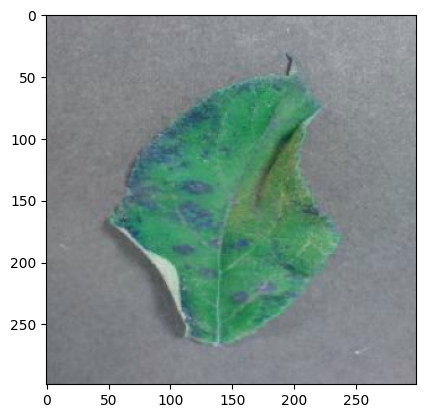

<Figure size 640x480 with 0 Axes>

SOURCE: class: Orange___Haunglongbing_(Citrus_greening), file: Orange___Haunglongbing_(Citrus_greening)/f1429807-c058-44d8-bb05-515ea7909ed0___UF.Citrus_HLB_Lab 0179.JPG
1/1 [==============================] - 0s 67ms/step
PREDICTED: class: Corn_(maize)___Common_rust_, confidence: 0.047523


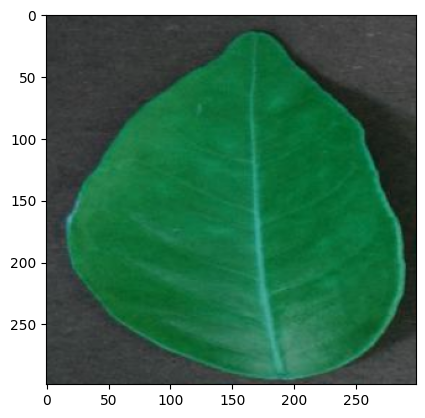

SOURCE: class: Tomato___Septoria_leaf_spot, file: Tomato___Septoria_leaf_spot/9cefe4b5-2da6-448b-b92d-82314f527bc1___Matt.S_CG 0665.JPG
1/1 [==============================] - 0s 68ms/step
PREDICTED: class: Tomato___Bacterial_spot, confidence: 0.089216


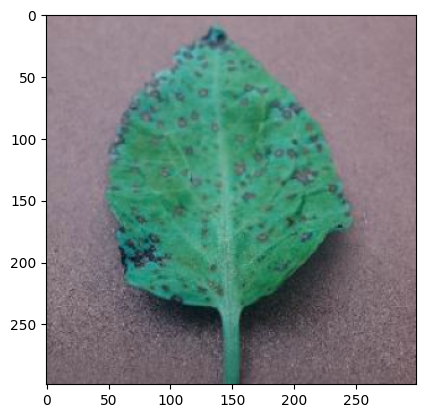

<Figure size 640x480 with 0 Axes>

SOURCE: class: Tomato___Tomato_Yellow_Leaf_Curl_Virus, file: Tomato___Tomato_Yellow_Leaf_Curl_Virus/5857b6f9-fe50-4850-927b-26940a8255ff___YLCV_GCREC 2087.JPG
1/1 [==============================] - 0s 68ms/step
PREDICTED: class: Squash___Powdery_mildew, confidence: 0.075506


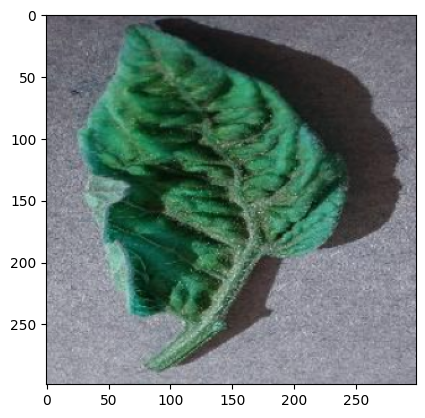

<Figure size 640x480 with 0 Axes>

SOURCE: class: Corn_(maize)___Common_rust_, file: Corn_(maize)___Common_rust_/RS_Rust 2540.JPG
1/1 [==============================] - 0s 85ms/step
PREDICTED: class: Grape___Esca_(Black_Measles), confidence: 0.050695


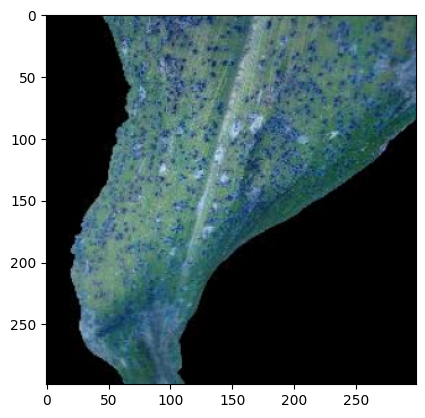

<Figure size 640x480 with 0 Axes>

In [ ]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2 as yolo
from collections import Counter
from glob import iglob


def load_image(filename):
    img = yolo.imread(os.path.join(data_dir, validation_dir, filename))
    img = yolo.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]) )
    img = img /255

    return img
def predict(image):
    probabilities = model.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)

    return {classes[class_idx]: probabilities[class_idx]}
for idx, filename in enumerate(random.sample(validation_generator.filenames, 5)):
    print("SOURCE: class: %s, file: %s" % (os.path.split(filename)[0], filename))

    img = load_image(filename)
    prediction = predict(img)
    print("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))
    plt.imshow(img)
    plt.figure(idx)
    plt.show()

In [ ]:
tflite_filename = f'{TFLITE_NAME_PREFIX}_model_{model_name}.tflite'
model.export(export_dir='.', tflite_filename=tflite_filename)

In [ ]:
# Export saved model version.
model.export(export_dir='.', export_format=ExportFormat.SAVED_MODEL)